<a href="https://colab.research.google.com/github/JonasSouza871/Data_Science/blob/main/Pandas_Selecionando_e_agrupando_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conhecendo os dados
-------

## Leitura dos dados

- Objetivos
-- analisar emissão de co2 em diferentes paises
-- Dataframe muito grande por isso indicado coolocar direto no google drive as informações.
-- Documento disponibilizado em planilha

In [ ]:
import pandas as pd

In [ ]:
emissoes_gases = pd.read_excel('/content/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name = 'GEE Estados') #leitura do documento excel somente

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
emissoes_gases.head() #mostra as 5 primeiras linhas do dataframe

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


In [ ]:
emissoes_gases.info() #mostra as informações do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

## Ajustando a base de dados

- Deve-se?
-- Remoção dos dados referentes a retirada dos gases estufa, que é o contrário da emissão
-- NCI são dados nao contemplados no invetário nacional
-- Bunkers sao emissões de transporte marítmo e aèrio internacional, portanto não são emissões diretas do estados

In [ ]:
# Remover dados que não serão utilziados
emissoes_gases['Emissão / Remoção / Bunker'].unique() #Mostra os valores únicos de cada coluna

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

In [ ]:
(emissoes_gases['Emissão / Remoção / Bunker'] == 'Remoção NCI')  | (emissoes_gases['Emissão / Remoção / Bunker'] == 'Remoção') #filtrando valores true e false com a comparação

,Emissão / Remoção / Bunker
0,False
1,False
2,False
3,False
4,False
...,...
103307,False
103308,False
103309,False
103310,False


In [ ]:
emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção'])] #filtrando valores true e false com a função isin mostrando qual as linha que tem as variaveis que queremos remover

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RO,PEC,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AC,PEC,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AM,PEC,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RR,PEC,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),PA,PEC,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR4,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR6,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [ ]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']),1970:2021].max() #filtrando apenas entre 1970 até 2021

,0
1970,0.0
1971,0.0
1972,0.0
1973,0.0
1974,0.0
1975,0.0
1976,0.0
1977,0.0
1978,0.0
1979,0.0


- Prova que todos os valores sao negativos entao devem ser retirados.

In [ ]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'] == 'Bunker', 'Estado'].unique() #retirar as do bunker dos estados

array([nan], dtype=object)

In [ ]:
emissoes_gases = emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'] == 'Emissão' ] #Todos os dados que foram analisados e filtrados serão subtituidos pela variavel Remoção
emissoes_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,MS,AGROPEC,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MT,AGROPEC,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MS,AGROPEC,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,N2O (t),MT,AGROPEC,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


In [ ]:
# Para eliminar os dados de Emissão :
emissoes_gases = emissoes_gases.drop(columns = ['Emissão / Remoção / Bunker']) #exclui a coluna

In [ ]:
emissoes_gases # Ja sem essa coluna

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


# Agrupamento de dados
--------------------------

## Remodelando o DataFrame

 - Objetivos:
 -- Alterar o formato do dataframe, separada por colunnas de anos para uma unica coluna com as informações dos anos e outra com a informações de emissao

 -- deve-se ter apenas 2 colunas, emissao e ano

In [ ]:
emissoes_gases.loc[:,'Nível 1 - Setor': 'Produto'].columns #mostra as colunas

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Gás', 'Estado', 'Atividade Econômica', 'Produto'],
      dtype='object')

- Colunas que serão mantidas na base de dados

In [ ]:
emissoes_gases.loc[:,1970:2021].columns # colunas dos anos

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021],
      dtype='object')

In [ ]:
# criando uma lista para armazenar as novas colunas:
Colunas_info = list(emissoes_gases.loc[:,'Nível 1 - Setor': 'Produto'].columns)
colunas_emissao = list(emissoes_gases.loc[:,1970:2021].columns)
colunas_emissao

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

- Função melt -> permite transformar varias colunas do pandas em apenas uma.

In [ ]:
emissoes_gases.melt(id_vars = Colunas_info, value_vars = colunas_emissao, var_name = 'ano' , value_name = 'Emissao') # Criação de uma coluna com os anos e uma com os valores de cada ano.
# Explicação completa no caderno

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,ano,Emissao
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0



## Agrupando os dados:

- Fazer a análise da quantidade de emissão total por tipo de gás -> nova análise.

In [ ]:
emissoes_por_ano = emissoes_gases.melt(id_vars = Colunas_info, value_vars = colunas_emissao, var_name = 'ano' , value_name = 'Emissao')

In [ ]:
emissoes_por_ano.groupby('Gás') # criação de um novo objeto chamado gás

In [ ]:
emissoes_por_ano.groupby('Gás').groups # mostra os grupos, mmostra cadas tipos de gás e seu respectivos valores do lado

{'C2F6 (t)': [410, 411, 412, 425, 426, 427, 95158, 95159, 95160, 95173, 95174, 95175, 189906, 189907, 189908, 189921, 189922, 189923, 284654, 284655, 284656, 284669, 284670, 284671, 379402, 379403, 379404, 379417, 379418, 379419, 474150, 474151, 474152, 474165, 474166, 474167, 568898, 568899, 568900, 568913, 568914, 568915, 663646, 663647, 663648, 663661, 663662, 663663, 758394, 758395, 758396, 758409, 758410, 758411, 853142, 853143, 853144, 853157, 853158, 853159, 947890, 947891, 947892, 947905, 947906, 947907, 1042638, 1042639, 1042640, 1042653, 1042654, 1042655, 1137386, 1137387, 1137388, 1137401, 1137402, 1137403, 1232134, 1232135, 1232136, 1232149, 1232150, 1232151, 1326882, 1326883, 1326884, 1326897, 1326898, 1326899, 1421630, 1421631, 1421632, 1421645, 1421646, 1421647, 1516378, 1516379, 1516380, 1516393, ...], 'CF4 (t)': [407, 408, 409, 422, 423, 424, 95155, 95156, 95157, 95170, 95171, 95172, 189903, 189904, 189905, 189918, 189919, 189920, 284651, 284652, 284653, 284666, 284667

In [ ]:
emissoes_por_ano.groupby('Gás').get_group('CO2 (t)') #So mostra os de CO2

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,ano,Emissao
18,Processos Industriais,Indústria Química,Produção de Acrilonitrila,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,0.000000
23,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),RJ,OUTRA_IND,NaN,1970,0.000000
26,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),MG,OUTRA_IND,NaN,1970,0.000000
29,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,10742.465792
32,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),SE,OUTRA_IND,NaN,1970,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4926255,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Outras Mudanças de uso da terra,Uso agropecuário -- Uso agropecuário,CO2 (t),MS,AGROPEC,NaN,2021,0.000000
4926272,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MT,AGROPEC,NaN,2021,374.000000
4926273,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MS,AGROPEC,NaN,2021,8613.000000
4926290,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Vegetação não florestal se...,CO2 (t),MT,AGROPEC,NaN,2021,934.000000


##  Soma total para cada tipo de gás:


In [ ]:
emissao_por_gas = emissoes_por_ano.groupby('Gás')[['Emissao']].sum() #soma total de cada tipo de gás
#metodo de agregação .sum() -> soma todos os valores
emissao_por_gas

,Emissao
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


In [ ]:
emissao_por_gas_ordenado = emissoes_por_ano.groupby('Gás')[['Emissao']].sum().sort_values('Emissao', ascending = False) #Função ascending quando true -> menor para o maior, quando false -> maior para menor
 #soma total de cada tipo de gás é colocado em uma unica coluna em ordem decrescente
emissao_por_gas_ordenado

,Emissao
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


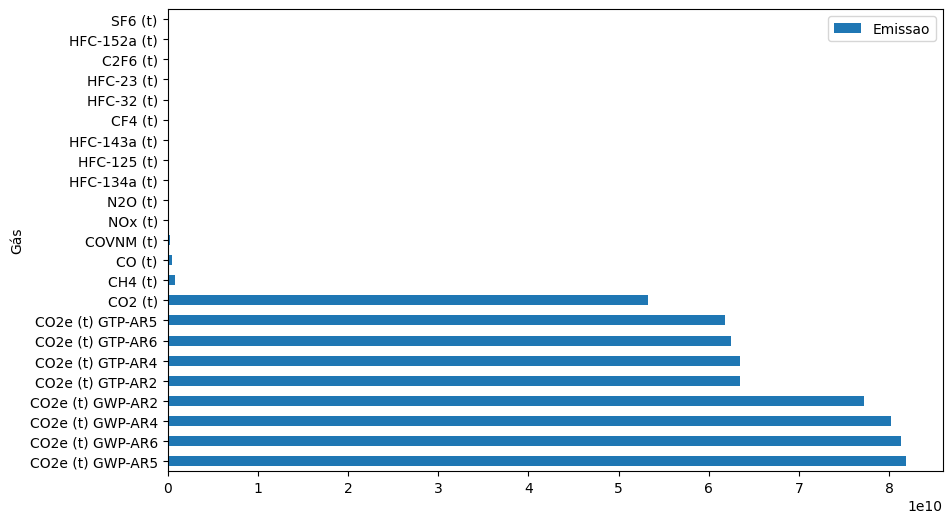

In [ ]:
#pPara plotar os resultados:
emissao_por_gas_ordenado.plot(kind = 'barh', figsize = (10,6)); #criação de um grafico horizontal com os resultados.

- escolhendo apenas os de CO2

In [ ]:
emissao_por_gas.iloc[0:9] #escolhe apenas do 0 ao 9

,Emissao
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


In [ ]:
print(f' A emissão de co2 corresponde a {float((emissao_por_gas.iloc[0:9].sum()/emissao_por_gas.sum()*100))} % da emissão de gases estufa no brasil entre 1970 e 2021')
# calculo emissão c02/ soma total para descobrir a porcentagem de co2 total

 A emissão de co2 corresponde a 48.79480599817889 % da emissão de gases estufa no brasil entre 1970 e 2021


<ipython-input-25-b94394630445>:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f' A emissão de co2 corresponde a {float((emissao_por_gas.iloc[0:9].sum()/emissao_por_gas.sum()*100))} % da emissão de gases estufa no brasil entre 1970 e 2021')


## Exercício:

1) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para visualizar o dicionário contendo as chaves de grupos formados e a lista de índices de cada grupo.

2) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" e localize os dados do grupo "Agropecuária".

3) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para identificar a média de emissão de cada atividade econômica no ano de 2021.

4) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para identificar a soma de emissão de cada atividade econômica. Ordene os dados da maior para menor emissão.

Caso precise de ajuda, opções de solução das atividades estarão disponíveis na seção “Opinião da pessoa instrutora”.

In [ ]:
emissoes_por_ano.groupby('Nível 1 - Setor').groups

{'Agropecuária': [1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, ...], 'Energia': [23277, 23278, 23279, 23280, 23281, 23282, 23283, 23284, 23285, 23286, 23287, 23288, 23289, 23290, 23291, 23292, 23293, 23294, 23295, 23296, 23297, 23298, 23299, 23300, 23301, 23302, 23303, 23304, 23305, 23306, 23307, 23308, 23309, 23310, 23311, 23312, 23313, 23314, 23315, 23316, 23317, 23318, 23319, 23320, 23321, 23322, 23323, 23324, 23325, 23326, 23327, 23328, 

In [ ]:
emissoes_por_ano.groupby('Nível 1 - Setor').get_group('Agropecuária')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,ano,Emissao
1137,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AC,AGR,ALIM_BEBIDAS,1970,0.000000
1138,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AL,AGR,ALIM_BEBIDAS,1970,2050.445805
1139,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AM,AGR,ALIM_BEBIDAS,1970,0.000000
1140,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AP,AGR,ALIM_BEBIDAS,1970,0.000000
1141,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),BA,AGR,ALIM_BEBIDAS,1970,466.934705
...,...,...,...,...,...,...,...,...,...,...,...,...
4855420,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),RS,AGR,ALIM_BEBIDAS,2021,929.545042
4855421,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),SC,AGR,ALIM_BEBIDAS,2021,295.813919
4855422,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),SE,AGR,ALIM_BEBIDAS,2021,32.734589
4855423,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),SP,AGR,ALIM_BEBIDAS,2021,653.155812


In [ ]:
emissoes_por_ano[emissoes_por_ano['ano']==2021].groupby('Nível 1 - Setor')[['Emissao']].mean()

,Emissao
Nível 1 - Setor,
Agropecuária,149793.768835
Energia,72928.637234
Mudança de Uso da Terra e Floresta,690085.511209
Processos Industriais,787101.255789
Resíduos,106106.723386


In [ ]:
emissoes_por_ano.groupby('Nível 1 - Setor')[['Emissao']].sum().sort_values('Emissao', ascending = False)

,Emissao
Nível 1 - Setor,
Mudança de Uso da Terra e Floresta,3.524898e+11
Energia,1.205314e+11
Agropecuária,1.147284e+11
Processos Industriais,2.849965e+10
Resíduos,1.034465e+10


# Agrupamentos multi-Index
----------------

- Descobrir quais sao os setores mais poluentes para cada gás
- Descobrir quais são os gases mais poluentes para cada setor

In [ ]:
gas_por_setor = emissoes_por_ano.groupby(['Gás','Nível 1 - Setor'])[['Emissao']].sum()
gas_por_setor # dataframe multi index
# primeira informação é o gás e o segundo é o setor
#ou seja duas informações e um valor

Emissao
Gás      Nível 1 - Setor                                 
C2F6 (t) Processos Industriais               5.765018e+02
CF4 (t)  Processos Industriais               7.135481e+03
CH4 (t)  Agropecuária                        5.928481e+08
         Energia                             3.429034e+07
         Mudança de Uso da Terra e Floresta  8.662166e+07
...                                                   ...
N2O (t)  Resíduos                            2.764127e+05
NOx (t)  Agropecuária                        2.602719e+06
         Energia                             9.361215e+07
         Processos Industriais               3.546360e+06
SF6 (t)  Processos Industriais               4.705800e+02

[72 rows x 1 columns]

In [ ]:
gas_por_setor.xs('CO2 (t)') #mostra apenas o CO2 por setor

,Emissao
Nível 1 - Setor,
Agropecuária,5.411750e+08
Energia,1.261352e+10
Mudança de Uso da Terra e Floresta,3.733930e+10
Processos Industriais,2.729603e+09
Resíduos,2.276264e+07


In [ ]:
gas_por_setor.xs(('CO2 (t)', 'Mudança de Uso da Terra e Floresta'),level = [0,1]) #mostra apenas o CO2 por setor mudanca de uso da terra e floresta
#O parametro level permite com que seja possivel definir quais termos serao mostrados exclusivamente, 0 se refere ao  CO2 (t) e 1 a mudança de uso da terra e floresta

,,Emissao
Gás,Nível 1 - Setor,
CO2 (t),Mudança de Uso da Terra e Floresta,3.733930e+10


In [ ]:
gas_por_setor.xs('CO2 (t)',level =0).idxmax() #Mostra qual é o setor que mais emitiu co2 apartir do objeto idmax.

,0
Emissao,Mudança de Uso da Terra e Floresta


## Emissão Máxima

- Ainda explorando o método groupby()

In [ ]:
gas_por_setor.groupby(level = 0).max() #valor maximo de emissão para cada gás

,Emissao
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),5.928481e+08
CO (t),3.959769e+08
CO2 (t),3.733930e+10
CO2e (t) GTP-AR2,3.850044e+10
CO2e (t) GTP-AR4,3.850044e+10
CO2e (t) GTP-AR5,3.831675e+10
CO2e (t) GTP-AR6,3.843359e+10


- Para juntar duas tabelas:

In [ ]:
gas_por_setor.groupby(level = 0).idxmax() #Todos os tipos de gases e o ID (Nome) de cada setor que mais poluiu ao lado.

,Emissao
Gás,
C2F6 (t),"(C2F6 (t), Processos Industriais)"
CF4 (t),"(CF4 (t), Processos Industriais)"
CH4 (t),"(CH4 (t), Agropecuária)"
CO (t),"(CO (t), Energia)"
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)"
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F..."


In [ ]:
Valores_max = gas_por_setor.groupby(level = 0).max().values#valor maximo de emissão para cada gás dentro da variavel valores max
tabela_sumarizada = gas_por_setor.groupby(level = 0).idxmax() #tabela com o setor que mais poluiu para cada tipo de gás
tabela_sumarizada.insert(1,'quantidade de emissão',Valores_max) #função insert permite adionar uma nova coluna a uma tabela
tabela_sumarizada #mostrar o que foi adicionado

,Emissao,quantidade de emissão
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",3.831675e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",3.843359e+10


In [ ]:
gas_por_setor.swaplevel()#troca a ordem das colunas

Emissao
Nível 1 - Setor                    Gás                   
Processos Industriais              C2F6 (t)  5.765018e+02
                                   CF4 (t)   7.135481e+03
Agropecuária                       CH4 (t)   5.928481e+08
Energia                            CH4 (t)   3.429034e+07
Mudança de Uso da Terra e Floresta CH4 (t)   8.662166e+07
...                                                   ...
Resíduos                           N2O (t)   2.764127e+05
Agropecuária                       NOx (t)   2.602719e+06
Energia                            NOx (t)   9.361215e+07
Processos Industriais              NOx (t)   3.546360e+06
                                   SF6 (t)   4.705800e+02

[72 rows x 1 columns]

## Análise de Emissões por ano

In [ ]:
emissoes_por_ano.groupby('ano')[['Emissao']] #agrupa os dados de ano e emissão

<Axes: xlabel='ano'>

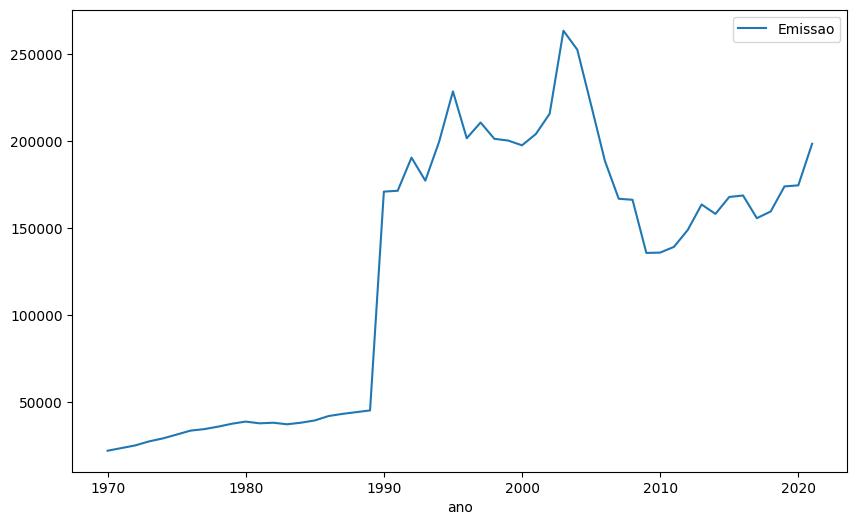

In [ ]:
emissoes_por_ano.groupby('ano')[['Emissao']].mean().plot(figsize = (10,6)) #tira a media e plota um grafico
# Esse gráfico contem uma analise de emissao(eixo y) por ano (eixo y) em média, assim é possivel fazer uma analise melhor de como se comportou esses dados

- Saldo gigantesco apartir de 1990 justificado pois os dados de emissão por queima de floresta so tem apartir dos anos 90

In [ ]:
emissoes_por_ano.groupby('ano')[['Emissao']].mean().idxmax() #Para saber em qual ponto teve o maior nivel de emissao de gases

,0
Emissao,2003


In [ ]:
emissao_por_gas_por_ano = emissoes_por_ano.groupby(['ano','Gás'])[['Emissao']].mean() #agrupa ano e gas e emissao, tirando media para cada
#primeiro separar por ano e, dentro de cada ano, separar por tipo de gás; depois, ele calcula a média das emissões em cada grupo.
emissao_por_gas_por_ano

Emissao
ano  Gás                     
1970 C2F6 (t)        0.232610
     CF4 (t)         3.557421
     CH4 (t)      1471.024024
     CO (t)       2155.556658
     CO2 (t)     19244.913199
...                       ...
2021 HFC-23 (t)      0.000000
     HFC-32 (t)    261.100000
     N2O (t)       119.295311
     NOx (t)       679.395431
     SF6 (t)         5.240000

[1196 rows x 1 columns]

from matplotlib import pyplot as plt
emissao_por_gas_por_ano['Emissao'].plot(kind='hist', bins=20, title='Emissao')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emissao_por_gas_por_ano['Emissao'].plot(kind='line', figsize=(8, 4), title='Emissao')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
emissao_por_gas_por_ano.to_csv('emissao_por_gas_por_ano.csv') #Salvando o resultado acima em arquivo CSV

-  Gerando Gráfico para cada tipo de gás por ano

In [ ]:
media_emissao_anual = emissao_por_gas_por_ano = emissoes_por_ano.groupby(['ano','Gás'])[['Emissao']].mean().reset_index()
media_emissao_anual

,ano,Gás,Emissao
0,1970,C2F6 (t),0.232610
1,1970,CF4 (t),3.557421
2,1970,CH4 (t),1471.024024
3,1970,CO (t),2155.556658
4,1970,CO2 (t),19244.913199
...,...,...,...
1191,2021,HFC-23 (t),0.000000
1192,2021,HFC-32 (t),261.100000
1193,2021,N2O (t),119.295311
1194,2021,NOx (t),679.395431


In [ ]:
media_emissao_anual = media_emissao_anual.pivot(index = 'ano', columns = 'Gás', values = 'Emissao')
media_emissao_anual #index, termo que nao sera mudado. Colums, separa cada tipo diferente de gas em
# uma nova coluna, e values o valor de emissao para cada gas em cada ano gerando assim uma tabela de
#melhor visualização dos resultados
#cada tipo de gás e cada ano separadamente.

Gás,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
ano,,,,,,,,,,,,,,,,,,,,,
1970,0.232610,3.557421,1471.024024,2155.556658,19244.913199,20821.379814,20821.379814,19162.726020,19775.283385,35396.183865,...,742.074863,0.000000,0.000000,0.000000,0.0,0.00,0.00,31.632709,154.072797,0.000
1971,0.334611,5.117360,1525.506914,2259.625805,21598.587743,22466.288595,22466.288595,20748.481445,21386.175802,37570.982886,...,730.119047,0.000000,0.000000,0.000000,0.0,0.00,0.00,32.609237,170.550178,0.000
1972,0.404684,6.189025,1584.719568,2418.944795,23664.445521,24100.305265,24100.305265,22303.224240,22966.797327,39800.768350,...,774.278817,0.000000,0.000000,0.000000,0.0,0.00,0.00,34.311864,188.856161,0.000
1973,0.463147,7.083136,1642.612439,2596.053853,27726.668829,26683.827206,26683.827206,24827.077028,25516.409611,42947.755490,...,796.866394,0.000000,0.000000,0.000000,0.0,0.00,0.00,35.278689,217.320480,0.000
1974,0.471026,7.203619,1704.614365,2681.450599,30155.918952,28539.318732,28539.318732,26600.481407,27321.124852,45431.240064,...,1024.694923,0.000000,0.000000,0.000000,0.0,0.00,0.00,37.098183,247.521415,0.000
1975,0.502952,7.691893,1854.360821,2730.894830,32292.965771,30593.767465,30593.767465,28507.669059,29285.642221,48944.729581,...,1065.682750,0.000000,0.000000,0.000000,0.0,0.00,0.00,39.451008,262.716346,0.000
1976,0.577172,8.826970,1932.641716,2702.494362,35640.344723,33066.878007,33066.878007,30879.481709,31693.226162,52203.028009,...,1091.778909,0.000000,0.000000,0.000000,0.0,0.00,0.00,41.583225,287.013048,0.000
1977,0.692855,10.596169,1931.897645,2675.992077,37313.909077,34182.312333,34182.312333,31967.243034,32784.131397,53333.605735,...,1147.712448,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.571086,292.405821,0.000
1978,0.749660,11.464915,1921.281930,2755.891877,40669.820049,35969.633601,35969.633601,33762.778999,34580.720998,55015.291182,...,1289.853564,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.426649,322.982906,0.000


- A função pivot reorganiza a tabela para facilitar a visualização, transformando valores em colunas.

 Neste caso:

1. Ela usa o ano como a linha (índice).
2. Cada tipo de gás se torna uma nova coluna.
3. Os valores de emissão ficam nas células correspondentes ao ano e ao gás.

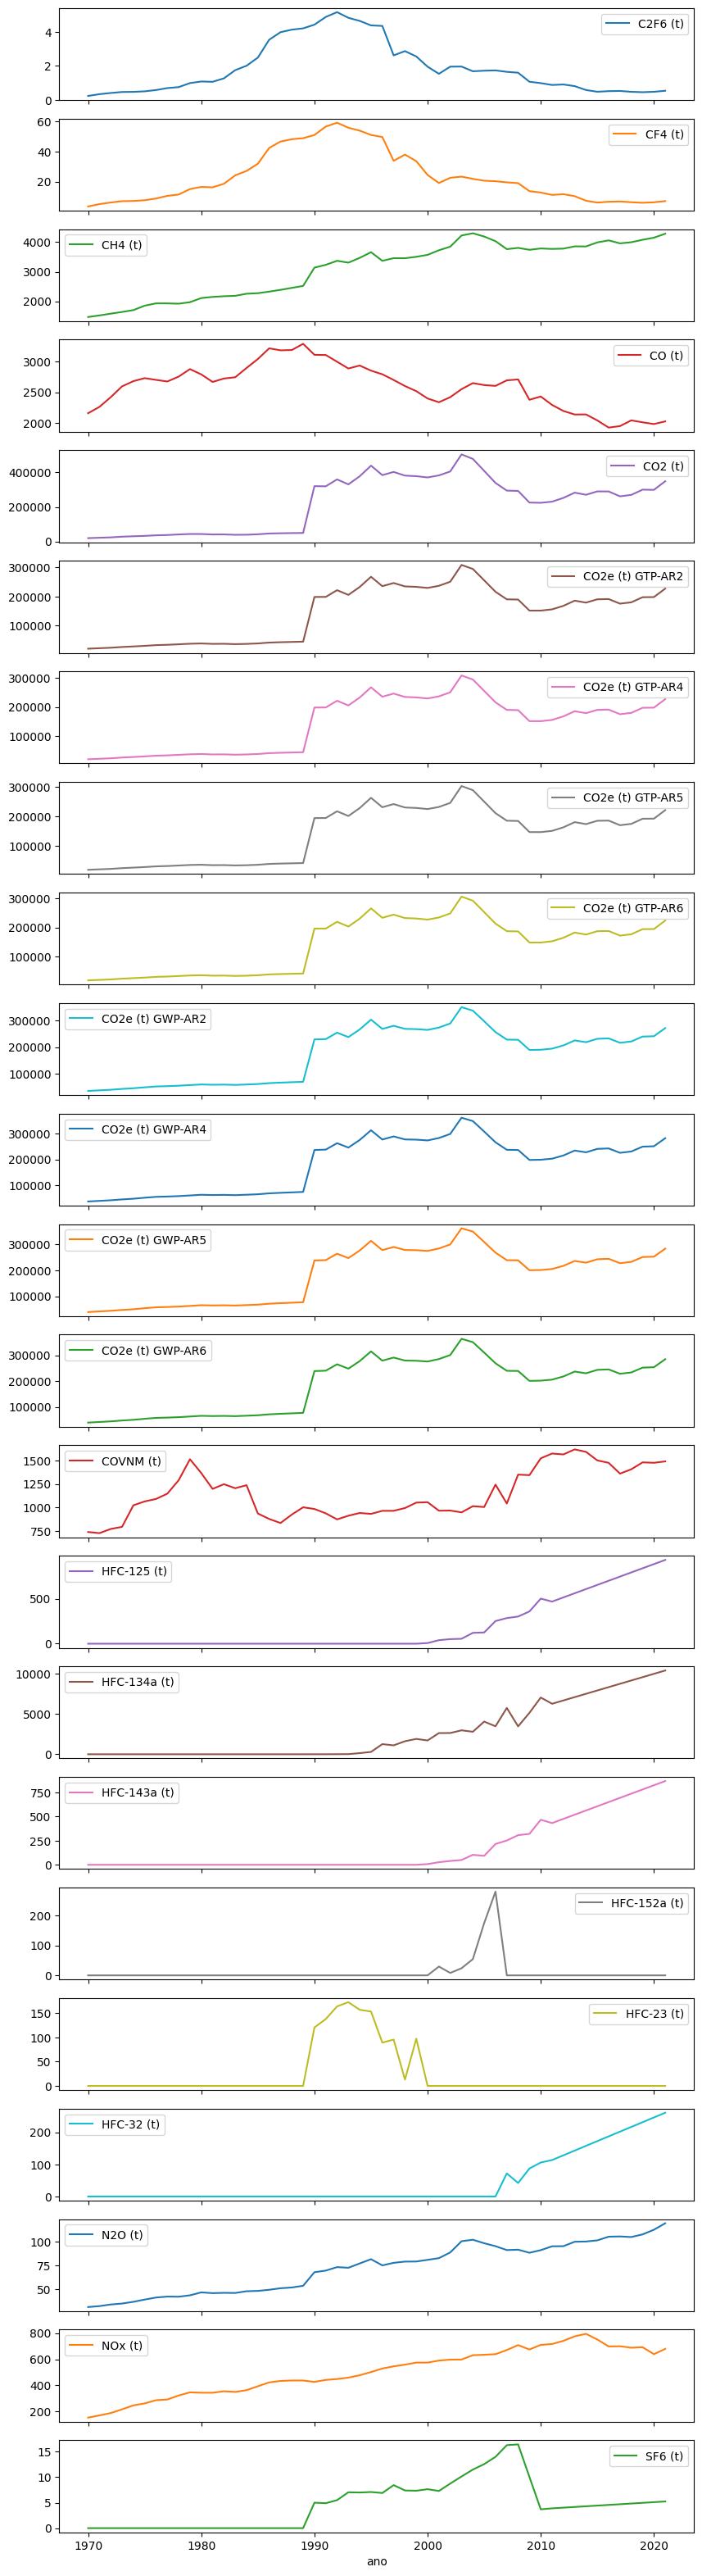

In [ ]:
media_emissao_anual.plot(subplots = True, figsize = (10,40)); #plota os resultados considerando ano
#como sendo o eixo X e os valores de emissao como sendo o eixo Y, foi utilizado o parametro subplot =true
# para que seja feitos novos gráficos considerando todos os tipos de gases que estão na tabela.
# Alem disso para melhor visualização o plot total foi feito com comprimento de 10 por 40 de largura permitidno a visualização de tudo


- Assim é possível fazer analise de cada gas separadamente, verificando variacoes ao longo dos anos, enquanto alguns tendem a subir outros tendem a descer e etc.

## Exercicios Curso

In [ ]:
# desafio

#para cada um dos setores econômicos da coluna "Nível 1 - Setor" ao longo dos anos. Como desafio, crie uma tabela de pivô e uma visualização gráfica contendo essas informações, utilizando apenas o método pivot_table para a construção da tabela,
#sem utilizar o método groupby.
emissoes_por_ano

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,ano,Emissao
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


Nível 1 - Setor   Agropecuária       Energia  \
ano                                            
1970              49292.425313  15939.703116   
1971              51199.559433  17698.989894   
1972              53508.935498  19092.876761   
1973              55494.006224  22062.085929   
1974              57896.513900  23810.659474   
1975              63303.098508  25036.433686   
1976              66347.533521  27214.281091   
1977              66977.413505  27645.258640   
1978              66640.432009  29734.461056   
1979              68772.609918  31194.321198   
1980              74295.742179  30666.218990   
1981              75025.775988  29136.675841   
1982              76085.207628  29031.613011   
1983              76278.523435  26973.830993   
1984              79177.283655  26534.682900   
1985              80002.645875  27764.868539   
1986              82032.138363  30918.412490   
1987              84598.887982  31385.211912   
1988              86789.730883  31587.92

<Axes: xlabel='ano'>

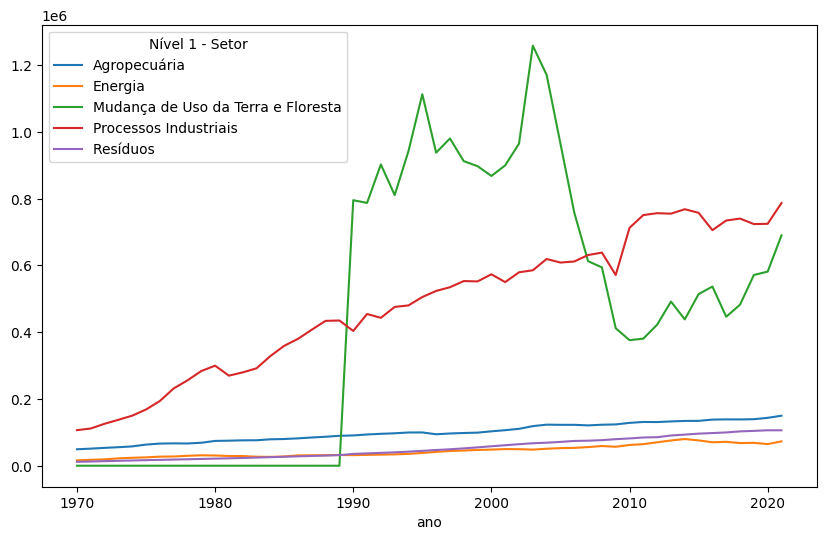

In [ ]:
media_emissao_setor = emissoes_por_ano.pivot_table(
    values='Emissao',           # A coluna cujos valores queremos calcular a média
    index='ano',                 # Índice (linha) para cada ano
    columns='Nível 1 - Setor',   # Colunas para cada setor econômico              # Função de agregação (média)
    aggfunc = 'mean'
    )
print(media_emissao_setor)
#
media_emissao_setor.plot(figsize=(10, 6))

array([<Axes: xlabel='ano'>, <Axes: xlabel='ano'>, <Axes: xlabel='ano'>,
       <Axes: xlabel='ano'>, <Axes: xlabel='ano'>], dtype=object)

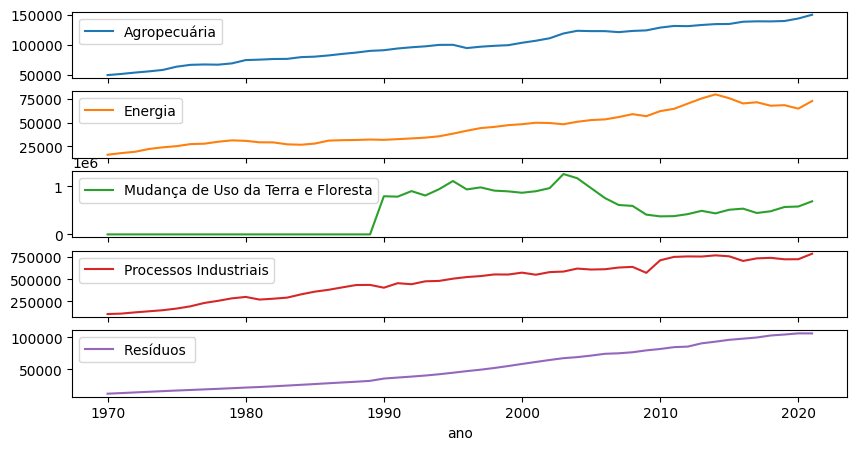

In [ ]:
# para mostrar os subplots:

media_emissao_setor.plot(subplots = True, figsize=(10, 5)) #Adicionando um subplot para caso setor poluente
#

A) Faça um agrupamento de dados com as colunas "Estado" e "Nível 1 - Setor", obtendo a soma de emissão e armazenando o resultado em uma tabela.

B) Utilizando a tabela construída na atividade 1, selecione os dados referentes à "Energia" do índice "Nível 1 - Setor".

C) Utilizando a tabela construída na atividade 1, encontre a atividade econômica com valor máximo de emissão do Estado de Minas Gerais

D) Obtenha uma tabela contendo a atividade econômica com máxima emissão para cada Estado.

E) Obtenha uma tabela contendo o Estado com máxima emissão para cada atividade econômica.



In [ ]:
## letra A
# Aqui eu irei agrupar as colunas Estados e Nivel 1 -setor (Coluna que tem todos os setores)
# Em seguida eu somei todas as emissoes em busca de um total
# Assim teremos 3 tabelas : Estado, nivel1 - Setor e o a soma de todas as emissoes durante todos os anos
emissoes_por_ano.groupby(['Estado','Nível 1 - Setor'])[['Emissao']].sum()
# Agrupa a coluna Estado e Setor e soma os valores da variavel emissao em busca de um total em todos os anos

Emissao
Estado Nível 1 - Setor                                 
AC     Agropecuária                        7.270206e+08
       Energia                             2.071751e+08
       Mudança de Uso da Terra e Floresta  7.847879e+09
       Resíduos                            2.928323e+07
AL     Agropecuária                        7.628303e+08
...                                                 ...
TO     Agropecuária                        2.762475e+09
       Energia                             5.130379e+08
       Mudança de Uso da Terra e Floresta  9.435591e+09
       Processos Industriais               2.613905e+07
       Resíduos                            6.177003e+07

[132 rows x 1 columns]

In [ ]:
## Letra B:
emissao_energia = emissoes_por_ano.pivot_table(
    values='Emissao',           # Valores de emissao somados acima
    index='Estado',                 # inde contento os estado
    columns='Nível 1 - Setor',   # Colunas para cada setor econômico
    )
emissao_energia = emissao_energia['Energia'] #filtra apenas os dados relacionados a energia e o indexado (estados)
print(emissao_energia) # Aqui aparece todos os setores, todas as emsisoes, todos os etdos

Estado
AC      4274.824535
AL      6658.357714
AM     19155.425975
AP      5058.016891
BA     41110.414264
CE     16827.672675
DF     14726.298821
ES     20053.619725
GO     33297.670007
MA     20484.748874
MG     87005.222731
MS     17386.955289
MT     29234.113532
PA     33512.176036
PB      8509.363465
PE     19319.460232
PI      7422.903727
PR     46927.634002
RJ     72906.341972
RN      9000.783239
RO     12554.664481
RR      3504.104170
RS     53382.985227
SC     40943.341266
SE      6896.599244
SP    178523.718754
TO      7713.927528
Name: Energia, dtype: float64


In [114]:
# Letra C:
# Ok para resolver essa questao eu deixarei idexao o setor e criarei as colunas apartir dos estados
# Dessa forma vai ser possivel filtrar melhor apenas os dados de 'Minas Gerais'
emissao_Minas_Gerais = emissoes_por_ano.pivot_table(
    values='Emissao',           # Valores de emissao somados acima
    index='Nível 1 - Setor',                 # indexa setores
    columns='Estado',   # Colunas para cada estado
    aggfunc = 'sum'
    )
print(emissao_Minas_Gerais) #Será mostrado todos os valores por estado

Estado                                        AC            AL            AM  \
Nível 1 - Setor                                                                
Agropecuária                        7.270206e+08  7.628303e+08  5.480091e+08   
Energia                             2.071751e+08  5.958697e+08  1.916462e+09   
Mudança de Uso da Terra e Floresta  7.847879e+09  4.619358e+08  1.549303e+10   
Processos Industriais                        NaN  6.035868e+07  6.577097e+07   
Resíduos                            2.928323e+07  1.372234e+08  2.095418e+08   

Estado                                        AP            BA            CE  \
Nível 1 - Setor                                                                
Agropecuária                        1.302005e+08  6.878724e+09  1.792303e+09   
Energia                             2.638059e+08  4.801368e+09  1.879584e+09   
Mudança de Uso da Terra e Floresta  1.279214e+09  1.121511e+10  1.743343e+09   
Processos Industriais                  

In [115]:
## Ainda letra C - Agora iremos aplicar um filtro para aparecer apenas os dados de minas gerais
emissao_Minas_Gerais = emissoes_por_ano.pivot_table(
    values='Emissao',           # Valores de emissao somados acima
    index='Nível 1 - Setor',                 # indexa setores
    columns='Estado',   # Colunas para cada estado
    aggfunc = 'sum' #soma de todos os valores
    )
emissao_Minas_Gerais = emissao_Minas_Gerais['MG'].idxmax() #filtra apenas os dados relacionados a energia e o indexado (estados)
print(emissao_Minas_Gerais) #Será mostrado todos os valores por estado
# Assim teremos o total para cada setor em minas gerais.
# E po plot com o maior setor poluente que é o de agropecuaria

Agropecuária


In [117]:
## Letra D:
# Para obter a atividade economica maxima de cada estado basta pegar a mesma informação dada a cima
# e ao invés de filtrar em minas gerais pegar o dado total e solicitar o idxmax de todos
Setor_Poluente_Por_Estado = emissoes_por_ano.pivot_table(
    values='Emissao',           # Valores de emissao somados acima
    index='Nível 1 - Setor',                 # indexa setores
    columns='Estado',   # Colunas para cada estado
    aggfunc = 'sum' #soma de todos os valores
    )

Setor_Poluente_Por_Estado  = Setor_Poluente_Por_Estado.idxmax() #Devolve o nome da atividade economica que mais polui
print(Setor_Poluente_Por_Estado ) #Será mostrado qual setor polui mais por estado.


Estado
AC    Mudança de Uso da Terra e Floresta
AL                          Agropecuária
AM    Mudança de Uso da Terra e Floresta
AP    Mudança de Uso da Terra e Floresta
BA    Mudança de Uso da Terra e Floresta
CE                               Energia
DF                               Energia
ES                 Processos Industriais
GO                          Agropecuária
MA    Mudança de Uso da Terra e Floresta
MG                          Agropecuária
MS    Mudança de Uso da Terra e Floresta
MT    Mudança de Uso da Terra e Floresta
PA    Mudança de Uso da Terra e Floresta
PB                          Agropecuária
PE                               Energia
PI    Mudança de Uso da Terra e Floresta
PR                          Agropecuária
RJ                               Energia
RN                               Energia
RO    Mudança de Uso da Terra e Floresta
RR    Mudança de Uso da Terra e Floresta
RS                          Agropecuária
SC                               Energia
SE       

In [122]:
## Letra E
## Para responder essa iremos fazer o contrario, indexar os estados e deixar em colunar os estados novamente.
## copiando o que está na letra A:
Estado_poluente_por_setor = emissoes_por_ano.pivot_table(
    values='Emissao',           # Valores de emissao somados acima
    index='Estado',                 # inde contento os estado
    columns='Nível 1 - Setor',   # Colunas para cada setor econômico
    aggfunc = 'sum'
    )
#Estado_poluente_por_setor = Estado_poluente_por_setor.idxmax() #Para saber o estado mais poluente de cada setor
print(Estado_poluente_por_setor ) # Aqui aparece todos os setores, todas as emsisoes, todos os etdos

Nível 1 - Setor  Agropecuária       Energia  \
Estado                                        
AC               7.270206e+08  2.071751e+08   
AL               7.628303e+08  5.958697e+08   
AM               5.480091e+08  1.916462e+09   
AP               1.302005e+08  2.638059e+08   
BA               6.878724e+09  4.801368e+09   
CE               1.792303e+09  1.879584e+09   
DF               9.409598e+07  9.487860e+08   
ES               1.380415e+09  2.201326e+09   
GO               1.187803e+10  2.761709e+09   
MA               3.143829e+09  1.699005e+09   
MG               1.445325e+10  9.663844e+09   
MS               9.999830e+09  1.593967e+09   
MT               1.135902e+10  2.296983e+09   
PA               6.036792e+09  2.730706e+09   
PB               8.453090e+08  8.358578e+08   
PE               1.498977e+09  2.089593e+09   
PI               1.451415e+09  5.044902e+08   
PR               7.516302e+09  5.502734e+09   
RJ               1.376439e+09  9.151787e+09   
RN           

Temos que :
- O estado que mais polui com agropecuaria é minas gerais
- o que mais polui com energia é sao paulo
- o que mais polui com uso da terra e floreestas é o Pará
- O que mais polui com processos industriais é minas gerais
- E o que mais polue com resíduos é sao paulo.

In [111]:
emissoes_estados_setor = emissoes_por_ano.groupby(['Estado', 'Nível 1 - Setor'])[['Emissao']].sum()
emissoes_estados_setor.groupby(level = 1).idxmax()

,Emissao
Nível 1 - Setor,
Agropecuária,"(MG, Agropecuária)"
Energia,"(SP, Energia)"
Mudança de Uso da Terra e Floresta,"(PA, Mudança de Uso da Terra e Floresta)"
Processos Industriais,"(MG, Processos Industriais)"
Resíduos,"(SP, Resíduos )"
